# Multimodal CLIP Imbedding

In [1]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRoBuMvSuYezLE9rwI-zOJeIOmcIGfDPqOvFA&s"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=["a photo of a dog"], images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
print(outputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
print(logits_per_image, logits_per_image.shape)
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
print(probs, probs.shape)

CLIPOutput(loss=None, logits_per_image=tensor([[25.0906]], grad_fn=<TBackward0>), logits_per_text=tensor([[25.0906]], grad_fn=<MulBackward0>), text_embeds=tensor([[ 8.7074e-03,  2.5829e-02, -3.8658e-02,  1.2289e-02, -1.0465e-02,
          8.2227e-03, -3.4132e-03, -7.6734e-02, -7.7502e-03,  3.8274e-02,
         -5.3368e-02, -3.0472e-02, -8.7328e-04, -4.2263e-04,  3.0874e-02,
          3.4900e-03,  3.1060e-02, -2.8744e-03, -2.9158e-02, -1.2004e-02,
          5.6583e-02,  1.0323e-02,  4.8625e-02,  2.4152e-03, -1.8617e-05,
          1.0560e-03,  3.9891e-03,  4.1941e-02, -2.4636e-02, -1.5361e-02,
          3.1289e-02,  2.9056e-02,  1.9494e-03,  7.0760e-03, -2.0747e-02,
         -1.7747e-02,  1.1385e-02, -2.5407e-02, -1.5976e-02,  2.4322e-02,
         -4.2275e-02,  2.8234e-02,  2.7083e-02,  2.3124e-03,  1.7070e-02,
          1.0458e-02, -2.7164e-02,  1.6151e-02, -3.0737e-03, -7.3802e-03,
          7.0237e-03, -1.2782e-02,  3.8851e-02, -7.8743e-03,  7.3336e-03,
         -4.1178e-02,  1.3934e-

In [ ]:
print(outputs.text_embeds, outputs.text_embeds.shape)
print(outputs.image_embeds, outputs.image_embeds.shape)

tensor([[ 8.7074e-03,  2.5829e-02, -3.8658e-02,  1.2289e-02, -1.0465e-02,
          8.2227e-03, -3.4132e-03, -7.6734e-02, -7.7502e-03,  3.8274e-02,
         -5.3368e-02, -3.0472e-02, -8.7328e-04, -4.2263e-04,  3.0874e-02,
          3.4900e-03,  3.1060e-02, -2.8744e-03, -2.9158e-02, -1.2004e-02,
          5.6583e-02,  1.0323e-02,  4.8625e-02,  2.4152e-03, -1.8617e-05,
          1.0560e-03,  3.9891e-03,  4.1941e-02, -2.4636e-02, -1.5361e-02,
          3.1289e-02,  2.9056e-02,  1.9494e-03,  7.0760e-03, -2.0747e-02,
         -1.7747e-02,  1.1385e-02, -2.5407e-02, -1.5976e-02,  2.4322e-02,
         -4.2275e-02,  2.8234e-02,  2.7083e-02,  2.3124e-03,  1.7070e-02,
          1.0458e-02, -2.7164e-02,  1.6151e-02, -3.0737e-03, -7.3802e-03,
          7.0237e-03, -1.2782e-02,  3.8851e-02, -7.8743e-03,  7.3336e-03,
         -4.1178e-02,  1.3934e-02,  5.3320e-03, -1.6559e-02, -2.8982e-03,
          3.8474e-02, -1.1961e-02, -1.6106e-02,  2.1629e-02,  1.8345e-02,
         -1.9301e-02, -9.2809e-03,  2.

## Generating Multimodal Embedding with CLIP

In [2]:
def get_multimodal_CLIP_embedding(text_description = None, image = None):
  if text_description == None and image == None:
    raise ValueError("Either text_description or image must be provided")
  elif text_description != None and image != None:
    inputs = processor(text=[text_description], images=image, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    return (outputs.text_embeds/2 + outputs.image_embeds/2).detach().flatten().tolist()
  elif text_description:
    inputs = processor(text=["a photo of a dog"], return_tensors="pt", padding=True)
    outputs = model.get_text_features(**inputs)
    return outputs.detach().flatten().tolist()
  elif image:
    inputs = processor(images=image, return_tensors="pt", padding=True)
    outputs = model.get_image_features(**inputs)
    return outputs.detach().flatten().tolist()
  #return np.concatenate((outputs.text_embeds, outputs.image_embeds), axis=0)


# Multimodal VDB Storing and Retrieving

In [3]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.9 MB/s eta 0:0

## Collection with OpenCLIPEmbeddingFunction()

In [16]:
!pip install open-clip-torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
  

In [4]:
import numpy as np
import pandas as pd

In [17]:
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
embedding_function = OpenCLIPEmbeddingFunction()

open_clip_model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [18]:
text_embed = embedding_function(["This is a cat"])

In [22]:
print(text_embed[0].shape)

(512,)


In [24]:
image_embed = embedding_function([np.array(image1)])

In [25]:
print(image_embed[0].shape)

(512,)


In [11]:
from chromadb.utils.data_loaders import ImageLoader
data_loader = ImageLoader()


In [32]:
import chromadb

client = chromadb.Client()

collection = client.create_collection(
    name='multimodal_collection',
    embedding_function = embedding_function,
    data_loader=data_loader)



In [33]:
from PIL import Image
import requests
url1 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRoBuMvSuYezLE9rwI-zOJeIOmcIGfDPqOvFA&s"
image1 = Image.open(requests.get(url1, stream=True).raw)
url2 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfiNlNG0uvJqDF_GyUNX97mvZNrtTUtNKx_Q&s"
image2 = Image.open(requests.get(url2, stream=True).raw)
url3 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlVTWL4dqk9ZokaiRQe0kdV3_dNvkB7A3xTw&s"
image3 = Image.open(requests.get(url3, stream=True).raw)



In [34]:
url2 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfiNlNG0uvJqDF_GyUNX97mvZNrtTUtNKx_Q&s"
image2 = Image.open(requests.get(url2, stream=True).raw)

In [ ]:
text1 = "This is a dog"
text2 = "This is a lion"
text3 = "This is a cat"
text_embedding1 = embedding_function(text1)[0]
image_embedding1 = embedding_function(np.array(image1))[0]
text_embedding2 = embedding_function(text2)[0]
image_embedding2 = embedding_function(np.array(image2))[0]
text_embedding3 = embedding_function(text3)[0]
image_embedding3 = embedding_function(np.array(image3))[0]

embeddings = [(text_embedding1*0.3 + image_embedding1*0.7), (text_embedding2*0.3 + image_embedding2*0.7), (text_embedding3*0.3 + image_embedding3*0.7)]
#embeddings = [(text_embedding1 + image_embedding1)/2, (text_embedding2 + image_embedding2)/2, (text_embedding3 + image_embedding3)/2]

In [ ]:
image = image2.resize((224, 224))

In [ ]:
print(np.array(image2).shape)
print(np.array(image).shape)

(178, 282, 3)
(224, 224, 3)


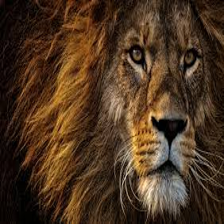

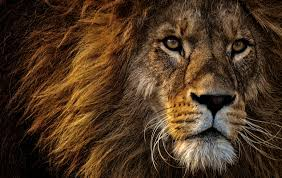

In [ ]:
from IPython.display import display
display(image)
display(image2)

In [39]:
image_embedding1 = embedding_function([np.array(image1)])[0].tolist()
image_embedding2 = embedding_function([np.array(image2)])[0].tolist()
image_embedding3 = embedding_function([np.array(image3)])[0].tolist()
embeddings = [image_embedding1, image_embedding2, image_embedding3]

In [40]:
print(embeddings)

[[0.0443202443420887, 0.12848463654518127, -0.05144283175468445, 0.00909173209220171, -0.016576264053583145, 0.03344268351793289, 0.015334757044911385, 0.040586091578006744, 0.004228729754686356, 0.007704261224716902, 0.029903749004006386, -0.07955078035593033, -0.0014639196451753378, -0.05869007483124733, 0.03889239951968193, 0.018257683143019676, -0.14895816147327423, -0.008764497935771942, -0.046711280941963196, 0.05038737133145332, -0.003723562229424715, -0.003123602131381631, 0.03792104870080948, 0.06128409132361412, -0.01716950163245201, 0.05982767418026924, 0.025766795501112938, -0.009232508018612862, 0.05542789772152901, -0.05545952916145325, -0.08505398780107498, 0.030483921989798546, 0.027397992089390755, 0.019361088052392006, 0.019328849390149117, 0.000923776300624013, 0.04393882304430008, 0.043534811586141586, -0.003241902682930231, -0.018236231058835983, 0.0009635316673666239, -0.005528316833078861, 0.048790592700242996, -0.05100660398602486, -0.03198610991239548, 0.009738

In [41]:
from importlib.metadata import metadata
collection.add(
    ids = ['id1', 'id2', 'id3'],
    documents = ["This is a dog", "This is a lion", "This is a cat"],
    embeddings = embeddings,
    metadatas = [{'topic':'dog'},{'topic':'lion'},{'topic':'cat'}]
)

In [ ]:
collection.update(
    ids = ['id1', 'id2', 'id3'],
    documents = ["This is a dog", "This is a lion", "This is a cat"],
    embeddings = [image_embedding1, image_embedding2, image_embedding3],
    metadatas = [{'topic':'dog'},{'topic':'lion'},{'topic':'cat'}]
)

In [48]:
'''Working with the image search well but not with text search'''
urlq = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4aBhloyMLx5qA6G6wSEi0s9AvDu1r7utrbQ&s"
imageq = Image.open(requests.get(urlq, stream=True).raw)
query_embed = embedding_function([np.array(imageq)])[0].tolist()
results = collection.query(
    #query_images=[np.array(imageq)] # A list of numpy arrays representing images
    query_texts=["a photo of a tiger"],#
    #query_embeddings=[query_embed]
    #n_results = 1,
    #include=["embeddings", "documents", "metadatas", "distances"]
)
print(results)

{'ids': [['id2', 'id3', 'id1']], 'embeddings': None, 'documents': [['This is a lion', 'This is a cat', 'This is a dog']], 'uris': None, 'data': None, 'metadatas': [[{'topic': 'lion'}, {'topic': 'cat'}, {'topic': 'dog'}]], 'distances': [[1.559569001197815, 1.5938156843185425, 1.8285155296325684]], 'included': [<IncludeEnum.distances: 'distances'>, <IncludeEnum.documents: 'documents'>, <IncludeEnum.metadatas: 'metadatas'>]}


In [ ]:
print(results['metadatas'])

[[{'topic': 'dog'}, {'topic': 'cat'}, {'topic': 'lion'}, {'topic': 'cat'}, {'topic': 'lion'}, {'topic': 'dog'}, {'topic': 'lion'}, {'topic': 'cat'}, {'topic': 'dog'}]]


## Collection with CLIP Embedding Function

In [ ]:
from chromadb.api.types import Documents, EmbeddingFunction, Embeddings

In [ ]:
'''from typing import List, Union
class MultimodalCLIPEmbeddingFunction(EmbeddingFunction):
    def __init__(self, processor, model):
        # Initialize the processor and model
        self.processor = processor
        self.model = model

    def __call__(self, documents: Union[str, None] = None, images: Union[Image.Image, np.ndarray, None] = None):
        if documents is None and image is None:
            raise ValueError("Either text or image must be provided.")

        inputs = {}

        if documents is not None:
            if not isinstance(documents, str):
                raise TypeError("text_description must be a string.")
            inputs["text"] = [documents]

        if image is not None:
            if isinstance(image, np.ndarray):
                image = Image.fromarray(image)  # Convert NumPy array to PIL image
            if not isinstance(image, Image.Image):
                raise TypeError("image must be a PIL Image or a NumPy array.")
            inputs["images"] = image

        inputs = self.processor(**inputs, return_tensors="pt", padding=True)

        if "text" in inputs and "images" in inputs:
            outputs = self.model(**inputs)
            return ((outputs.text_embeds + outputs.image_embeds) / 2).detach().numpy().flatten().tolist()

        elif "text" in inputs:
            outputs = self.model.get_text_features(**inputs)
            return outputs.detach().numpy().flatten().tolist()

        elif "images" in inputs:
            outputs = self.model.get_image_features(**inputs)
            return outputs.detach().numpy().flatten().tolist()'''

In [7]:
embedding1 = get_multimodal_CLIP_embedding(image = image1)
embedding2 = get_multimodal_CLIP_embedding(image = image2)
embedding3 = get_multimodal_CLIP_embedding(image = image3)

In [27]:
collection_CLIP = client.create_collection(
    name='collection1',
    embedding_function = embedding_function,
    data_loader=data_loader)

UniqueConstraintError: Collection collection1 already exists

In [29]:
collection_CLIP.add(
    ids = ['id1', 'id2', 'id3'],
    #uris = [url1, url2, url3],
    #images=[np.array(image1), np.array(image2), np.array(image3)], # A list of numpy arrays representing images
    documents = ["This is a dog", "This is a lion", "This is a cat"],
    embeddings = [embedding1, embedding2, embedding3],
    metadatas = [{'topic':'dog'},{'topic':'lion'},{'topic':'cat'}]
)

In [28]:
collection_CLIP.update(
    ids = ['id1', 'id2', 'id3'],
    #uris = [url1, url2, url3],
    #images=[np.array(image1), np.array(image2), np.array(image3)], # A list of numpy arrays representing images
    documents = ["This is a dog", "This is a lion", "This is a cat"],
    embeddings = [embedding1, embedding2, embedding3],
    metadatas = [{'topic':'dog'},{'topic':'lion'},{'topic':'cat'}]
)

In [31]:
'''Working with the image search well but not with text search'''
urlq = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4aBhloyMLx5qA6G6wSEi0s9AvDu1r7utrbQ&s"
imageq = Image.open(requests.get(urlq, stream=True).raw)
#query_embed = get_multimodal_CLIP_embedding(image = imageq)
#query_embed = get_multimodal_CLIP_embedding(text_description = "a photo of a cat")
results = collection_CLIP.query(
    #query_images=[np.array(imageq)] # A list of numpy arrays representing images
    query_texts=["a photo of a cat"]
    #query_embeddings=[query_embed]
    #n_results = 1,
    #include=["embeddings", "documents", "metadatas", "distances"]
)
print(results)

{'ids': [['id1', 'id2', 'id3']], 'embeddings': None, 'documents': [['This is a dog', 'This is a lion', 'This is a cat']], 'uris': None, 'data': None, 'metadatas': [[{'topic': 'dog'}, {'topic': 'lion'}, {'topic': 'cat'}]], 'distances': [[124.1988296508789, 125.2618408203125, 127.10981750488281]], 'included': [<IncludeEnum.distances: 'distances'>, <IncludeEnum.documents: 'documents'>, <IncludeEnum.metadatas: 'metadatas'>]}


# Getting URI for Local and online image
 1. Getting the URI of an Online Image
If an image is hosted on the internet, you can directly use its URL as the URI.

In [ ]:
from pathlib import Path

local_image_path = "images/sample.jpg"  # Relative or absolute path
local_image_uri = Path(local_image_path).resolve().as_uri()

print(local_image_uri)  # Example: "file:///C:/Users/YourName/images/sample.jpg"


# With URIS

In [ ]:
import os
from pathlib import Path
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.webp')):  # Check for image extensions
            img_path = os.path.join(folder_path, filename)
            try:
                #img = Image.open(img_path)  # Open image
                img = img_path#Path(img_path).resolve().as_uri()
                images.append(img)
            except Exception as e:
                print(f"Error loading image {filename}: {e}")
    return images

In [ ]:
uris = load_images_from_folder('/content/')

In [ ]:
print(uris)

['/content/sea.jpg', '/content/pritom.jpg', '/content/forest.jpg', '/content/Hummingbird.jpg', '/content/images (2).jpg', '/content/beach.jpg', '/content/lion.jpg', '/content/hiking.jpg', '/content/cat.jpg', '/content/running.jpg', '/content/Boatincanal.jpg', '/content/tracker.jpg', '/content/canal.jpg', '/content/river.jpg', '/content/Man.jpg', '/content/swimming.jpg', '/content/masranga.jpg', '/content/hill.jpg', '/content/Objects.jpg', '/content/snake.jpg', '/content/dog.jpg', '/content/parrot.jpg', '/content/skatting.jpg', '/content/surfing.jpg']


In [ ]:
collection = client.create_collection(
    name ='URIs_collection',
    embedding_function = embedding_function,
    data_loader = data_loader)

In [ ]:
for id, uri in enumerate(uris):
  collection.add(ids=[str(id)], uris = [uri], metadatas={'Link':f'{uri}'})

In [ ]:
from importlib.metadata import metadata

for id, uri in enumerate(uris):
  collection.update(ids=[str(id)], uris = [uri], metadatas={'Link':f'{uri}'})

'''collection.add(
    ids = ['id1', 'id2', 'id3'],
    uris = uris,
    #embeddings = embeddings,
    metadatas = [{'topic':'dog'},{'topic':'lion'},{'topic':'cat'}]
)'''

"collection.add(\n    ids = ['id1', 'id2', 'id3'],\n    uris = uris,\n    #embeddings = embeddings,\n    metadatas = [{'topic':'dog'},{'topic':'lion'},{'topic':'cat'}]\n)"

In [ ]:
results = collection.query(
    query_uris=["/content/sea.jpg"] # A list of numpy arrays representing images
    #query_texts=["birds"]
    #query_embeddings=[query_embed]
    #n_results = 1,
    #include=["embeddings", "documents", "metadatas", "distances"]
)
print(results)

{'ids': [['0', '23', '2', '5', '17', '15', '7', '9', '13', '11']], 'embeddings': None, 'documents': [[None, None, None, None, None, None, None, None, None, None]], 'uris': None, 'data': None, 'metadatas': [[{'Link': '/content/sea.jpg'}, {'Link': '/content/surfing.jpg'}, {'Link': '/content/forest.jpg'}, {'Link': '/content/beach.jpg'}, {'Link': '/content/hill.jpg'}, {'Link': '/content/swimming.jpg'}, {'Link': '/content/hiking.jpg'}, {'Link': '/content/running.jpg'}, {'Link': '/content/river.jpg'}, {'Link': '/content/tracker.jpg'}]], 'distances': [[0.0, 0.7389665246009827, 0.7592992782592773, 0.8190758228302002, 0.9004141092300415, 0.9467778205871582, 0.9980501532554626, 1.013914942741394, 1.0799297094345093, 1.11430025100708]], 'included': [<IncludeEnum.distances: 'distances'>, <IncludeEnum.documents: 'documents'>, <IncludeEnum.metadatas: 'metadatas'>]}


In [ ]:
for id, uri in enumerate(uris):
  collection.add(
      ids=[str(id)], uris = [uri], metadatas={'Link':f'{uri}'}
  )

# Vector DB Querying

`collection.add(
    ids=["id1", "id2"],
    documents=["This is a dog", "This is a cat"],
    metadatas=[
        {"tags": ["animal", "pet", "mammal"], "type": "dog"},
        {"tags": ["animal", "pet", "feline"], "type": "cat"},
    ]
)`


`results = collection.query(
    query_texts=["animal"],
    n_results=2,
    where={"tags": {"$contains": "pet"}}  # Filter for "pet" in tags
)`


`collection.query(
    query_texts=["doc10", "thus spake zarathustra", ...],
    n_results=10,
    where={"metadata_field": "is_equal_to_this"},
    where_document={"$contains":"search_string"}
)`


1. [Filtering By Tags] https://docs.trychroma.com/docs/querying-collections/metadata-filtering

2. [Full Text Search] https://docs.trychroma.com/docs/querying-collections/full-text-search

In [ ]:
!pip install chromadb

In [ ]:
!pip install open-clip-torch

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import requests

In [ ]:
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
embedding_function = OpenCLIPEmbeddingFunction()

In [ ]:
image_embed = embedding_function([np.array(image1)])
text_embed = embedding_function(["This is a cat"])

In [ ]:
print(text_embed[0].shape)
print(image_embed[0].shape)

In [ ]:
from chromadb.utils.data_loaders import ImageLoader
data_loader = ImageLoader()

## Creating Collection

In [ ]:
import chromadb

client = chromadb.Client()

collection = client.create_collection(
    name='multimodal_collection',
    embedding_function = embedding_function,
    data_loader=data_loader)

## Loading and Getting Embeddings of images

In [ ]:
url1 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRoBuMvSuYezLE9rwI-zOJeIOmcIGfDPqOvFA&s"
image1 = Image.open(requests.get(url1, stream=True).raw)
url2 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfiNlNG0uvJqDF_GyUNX97mvZNrtTUtNKx_Q&s"
image2 = Image.open(requests.get(url2, stream=True).raw)
url3 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlVTWL4dqk9ZokaiRQe0kdV3_dNvkB7A3xTw&s"
image3 = Image.open(requests.get(url3, stream=True).raw)

In [ ]:
image_embedding1 = embedding_function([np.array(image1)])[0].tolist()
image_embedding2 = embedding_function([np.array(image2)])[0].tolist()
image_embedding3 = embedding_function([np.array(image3)])[0].tolist()
embeddings = [image_embedding1, image_embedding2, image_embedding3]

## Adding to the Collection

In [ ]:
from importlib.metadata import metadata
collection.add(
    ids = ['id1', 'id2', 'id3'],
    documents = ["This is a dog", "This is a lion", "This is a cat"],
    embeddings = embeddings,
    metadatas = [{'topic':'dog'},{'topic':'lion'},{'topic':'cat'}]
)

## Updating the Collection

In [ ]:
collection.update(
    ids = ['id1', 'id2', 'id3'],
    documents = ["This is a dog", "This is a lion", "This is a cat"],
    embeddings = embeddings,
    metadatas = [{'topic':'dog'},{'topic':'lion'},{'topic':'cat'}]
)

## Querying to the Collection

In this setting I can perform query by direct giving image, text and embeddings of query or text. Arguments are given below:
1. image : `query_images = [np.array(image)]`
2. texts : `query_texts = ["a photo of a cat"]`
3. embeddings of any modality : `query_embeddings = [embedding]`

In [ ]:
urlq = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4aBhloyMLx5qA6G6wSEi0s9AvDu1r7utrbQ&s"
imageq = Image.open(requests.get(urlq, stream=True).raw)
query_embed = embedding_function([np.array(imageq)])[0].tolist() # send the images as a list of numpy arrays and convert each arrays in the returned list into list so it becomes list of lists
#query_embed = embedding_function("a photo of a cat")[0].tolist() # send the texts as a list of strings and convert each arrays in the returned list into list so it becomes list of lists
results = collection.query(
    #query_images=[np.array(imageq)] # Send images as a list of numpy arrays
    query_texts=["a photo of a cat"], # Send texts as a list of strings
    #query_embeddings=[query_embed] # Send embedding list as a list of lists
    #n_results = 1,
    #include=["embeddings", "documents", "metadatas", "distances"]
)
print(results)

## Image Metadata

In [50]:
!pip install exifread

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.5 MB/s eta 0:00:00


In [57]:
import exifread

def read_exif_metadata(image_path):
    with open(image_path, "rb") as image_file:
        tags = exifread.process_file(image_file)

    metadata = {tag: tags[tag] for tag in tags}
    return metadata

# Example usage
metadata = read_exif_metadata("/content/Boatincanal.jpg")
print(metadata)
for key, value in metadata.items():
    print(f"{key}: {value}")


{}


#### Using PIL (Pillow)

In [56]:
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS

def get_image_metadata(image_path):
    image = Image.open(image_path)
    exif_data = image._getexif()

    if not exif_data:
        return "No EXIF metadata found"

    metadata = {}

    for tag_id, value in exif_data.items():
        tag_name = TAGS.get(tag_id, tag_id)
        metadata[tag_name] = value

    return metadata

# Example usage
image_path = "/content/Boatincanal.jpg"  # Replace with your image path
metadata = get_image_metadata(image_path)
try:
  for key, value in metadata.items():
    print(f"{key}: {value}")
except:
  print(metadata)


No EXIF metadata found


#### Extracting GPS Data (Latitude & Longitude)

In [58]:
def get_gps_info(exif_data):
    gps_info = {}

    for tag_id, value in exif_data.items():
        tag_name = TAGS.get(tag_id, tag_id)
        if tag_name == "GPSInfo":
            for t in value:
                sub_tag_name = GPSTAGS.get(t, t)
                gps_info[sub_tag_name] = value[t]

    return gps_info

# Extract GPS coordinates
image_path = "/content/Boatincanal.jpg"
image = Image.open(image_path)
exif_data = image._getexif()

if exif_data:
    gps_data = get_gps_info(exif_data)
    print("GPS Metadata:", gps_data)


#### Using PyExifTool (Best for Large Metadata)

In [59]:
!pip install pyexiftool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 2.0 MB/s eta 0:00:00


In [60]:
import exiftool

def extract_metadata(image_path):
    with exiftool.ExifTool() as et:
        metadata = et.get_metadata(image_path)
    return metadata

# Example usage
image_path = "/content/Boatincanal.jpg"
metadata = extract_metadata(image_path)
for key, value in metadata.items():
    print(f"{key}: {value}")


FileNotFoundError: "exiftool" is not found, on path or as absolute path